# Robot Control WS22/23
## 3R Roboter

Date:    **23.12.2022** \
Author:  **Kaufmann Stefan**


In [ ]:
"""
Date: 20.12.2022
Author: Kaufmann Stefan

Robot Control - Simulation 3R Roboter 
"""

import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin, model_nlin_ext


# 2. Modellbildung

![Alt text](fig/3R_Manipulator.png)


In [ ]:
from Kinematik_3R import *
# Den Sourcecode finden Sie unter Kinematik_3R.py

''' Jacobimatrix '''
# zum Abspielen eingach die gewünsche Variable entkommentieren

#Jv_1
#Jv_2
#Jv_3

#Jw_1
Jw_2
#Jw_3


In [ ]:
''' Kinetische Energie und Massenmatrix '''

D

In [ ]:
''' Christoffel Symbole'''
C

# qd  = erste Zeitableitung des Gelenkes
# qdd = zweite Zeitableitung des Gelenkes

In [ ]:
''' mechanische Teilsystem '''
tau = D*qdd + C*qd + gv.T
#sym.simplify(tau)

In [ ]:
'''Erweitertes System '''

M



#B+R+C

# 3. Kinematik

# 4. Simulation

In [ ]:
'''Vorwärtskinematik'''
from Kinematik_3R import T0e, T03sub

# Für Nummerische Berechnung T0e
# Für symbolische Berechnung T03sub    --> nicht bei der Inversen Matrix zu empfehlen --> hoher Rechenaufwand

q = [0,0,0]

X = T0e*[q1,q2,q3]

X   # Ausgabe


In [ ]:
'''Inverse Kinematik'''
x,y = 1, 1

X = [x,y,0] 

q = T0e.inv()*X

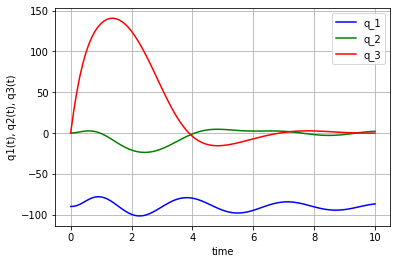

In [2]:
import Animation as anim
import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin_ext
#from Vorsteuerung import *


x0=[-np.pi/2,0,np.pi/2,  0,0,0]       # x0 = [q1,q2,q3,qd1,qd2,qd3]

# define the discretization points
t_start = 0
t_stop = 10
dt = 1e-1

t_sim = np.linspace(t_start, t_stop, int((t_stop - t_start) / dt + 1))


# Define the controller
class Controller:
  def __init__(self,u,t):   
    #from Vorsteuerung import flat_output
    self.ctr = 'nix'
    self.u  = u
    self.t  = t

u=[0,0,0]

controller = Controller(u,t_sim)

#Wrapper für rechte Seite der Differentialgleichung
rhs=lambda t,x:model_nlin_ext(t,x,controller)
    
solOde = solve_ivp(rhs,                  #zu simulierendes Modell
                    [t_start,t_stop],    #Zeitspanne für Simulation
                    x0,                  #Anfangszustand 
                    t_eval=t_sim,        #Auswertungszeitpunkte
                    atol=1e-9,rtol=1e-6  #Toleranzen
                    )


plt.plot(solOde.t, solOde.y[0]*180/np.pi, 'b', label='q_1')
plt.plot(solOde.t, solOde.y[1]*180/np.pi, 'g', label='q_2')
plt.plot(solOde.t, solOde.y[2]*180/np.pi, 'r', label='q_3')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('q1(t), q2(t), q3(t)')
plt.grid()
plt.show()

anim.plot(solOde.y[0],solOde.y[1],solOde.y[2],dt)